In [1]:
!pip install scikit-learn
# !pip install numpy 
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

You should consider upgrading via the 'C:\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
heights = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]
print(len(weights))
print(len(heights))

10
10


In [3]:
# dictionary 형태로 데이터 생성
body_df = pd.DataFrame({'height' : heights, 'weight' : weights})
body_df.head(3)

,height,weight
0,187,87
1,174,81
2,179,82


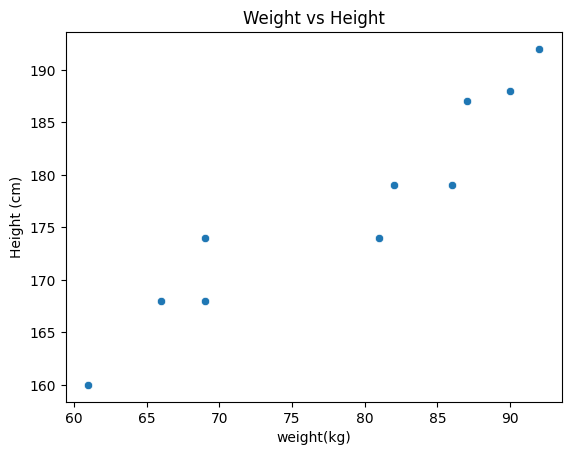

In [4]:
#weight와 height간의 산점도(scatter plot)
sns.scatterplot( data = body_df, x = 'weight', y = 'height')
plt.title('Weight vs Height')
plt.xlabel('weight(kg)')
plt.ylabel('Height (cm)')
plt.show()

In [6]:
# 선형회귀 훈련(적합)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [7]:
# DataFrame[]: Series(데이터 프레임의 컬럼)
# DataFrame[[]]: DataFrame
X = body_df[['weight']]
y = body_df[['height']]

In [8]:
X.head(3)

,weight
0,87
1,81
2,82


In [9]:
y.head(3)

,height
0,187
1,174
2,179


In [10]:
#데이터 훈련
model_lr.fit(X = X, y = y)

LinearRegression()

In [11]:
# 가중치(w1)
print(model_lr.coef_)
# 편향(bias, w0)
print(model_lr.intercept_)

[[0.86251245]]
[109.36527488]


In [12]:
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [13]:
print('y = {}x + {}'.format(w1.round(2),w0.round(2)))

y = 0.86x + 109.37


- y(height)는 x(몸무게)에 0.86을 곱한뒤 109.37을 더하면 된다. 

1. 구글링 -> 블로그
 - 단점은 늘 블로그가 바뀌고, 형태 일정하지 않음.

2. chatgpt LLM
- 단점: 의존하게되면 더이상 공부를 안해요. 거짓된 정보를 전달하는 경우

3. 공식문서 
- 장점: 일괄되게 정리되어있어서, 동일한 위치(경로) 똑같은문서가 있음
- 자격증: 공식문서만 열람할수있음. 
- 단점은 읽기 어렵다. 초보자가. 

In [14]:
help(sklearn.linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

- y = 0.86x + 109.37
- 활용하여 예측 컬럼을 추가.
- 에러값을 각각 계산(error)
- 양수를 만들기위해 제곱
- 모두 더할 예정(MSE)

In [15]:
body_df.head(3)

,height,weight
0,187,87
1,174,81
2,179,82


In [16]:
#예측값을 만들기
body_df['pred'] = body_df['weight']*w1 + w0
body_df.head(3)

,height,weight,pred
0,187,87,184.403858
1,174,81,179.228784
2,179,82,180.091296


In [17]:
# 에러
body_df['error'] = body_df['height'] - body_df['pred']
body_df.head(3)

,height,weight,pred,error
0,187,87,184.403858,2.596142
1,174,81,179.228784,-5.228784
2,179,82,180.091296,-1.091296


In [18]:
body_df['error^2'] = body_df['error']*body_df['error']
body_df.head(3)

,height,weight,pred,error,error^2
0,187,87,184.403858,2.596142,6.739951
1,174,81,179.228784,-5.228784,27.340178
2,179,82,180.091296,-1.091296,1.190927


In [19]:
# MSE계산 완료 10
body_df['error^2'].sum()/len(body_df)

10.152939045376318

-산점도 그래프에 선형식을 만들어서 그래프로 그리기 ㅣ

<Axes: xlabel='weight', ylabel='height'>

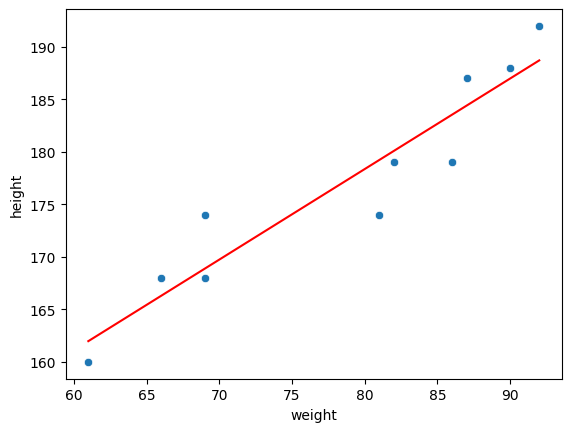

In [20]:
sns.scatterplot(data = body_df, x = 'weight', y = 'height')
sns.lineplot(data = body_df, x = 'weight', y = 'pred', color = 'red')

- 선형회귀 모델 평가
 - 회귀(숫자를 맞추는 방법): MSE(수동계산은 10)
 - R Square 값이: 평균대비 설명력, 0이면 제일낮음, 1일수록 높은것.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# 평가함수는 공통적으로 정답(실제 true), 예측값(pred)
y_true = body_df['height']
y_pred = body_df['pred']
mean_squared_error(y_true, y_pred)

10.152939045376318

In [24]:
r2_score(y_true, y_pred)

0.8899887415172141

In [25]:
y_pred2 = model_lr.predict(body_df[['weight']])
y_pred2

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

In [26]:
mean_squared_error(y_true,y_pred2)

10.152939045376318

- seaborn 시각화 라이브러리는 기본적으로 데이터셋을 제공

In [27]:
tips_df = sns.load_dataset('tips')
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [28]:
# X: total_bill
# y: tip 

In [29]:
model_lr2 = LinearRegression()
X = tips_df[['total_bill']]
y = tips_df[['tip']]
model_lr2.fit(X,y)

LinearRegression()

<Axes: xlabel='total_bill', ylabel='tip'>

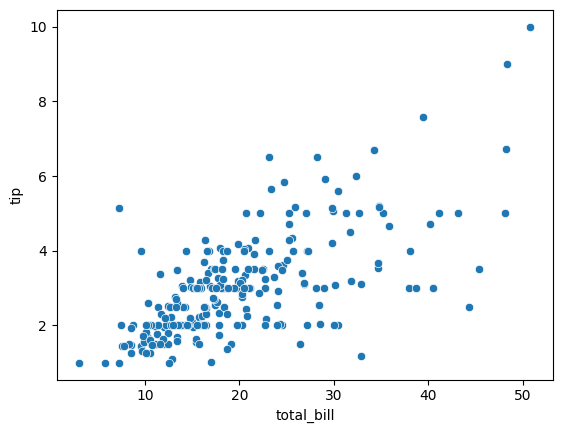

In [30]:
sns.scatterplot(data = tips_df, x = 'total_bill', y=  'tip')

In [31]:
# y(tip) = w1*x(total_bill) + w0
w1_tip = model_lr2.coef_[0][0]
w0_tip = model_lr2.intercept_[0]

In [32]:
print('y = {}x + {}'.format(w1_tip.round(2), w0_tip.round(2)))
# 전체 결제금액이 1달러 오를때, 팁은 0.11달러 추가된다.
# 전체 결제금액이 100달러 오를때, 팁은 11달러 추가된다. 

y = 0.11x + 0.92


In [33]:
# 예측값 생성
y_true_tip = tips_df['tip']
y_pred_tip = model_lr2.predict(tips_df[['total_bill']])

In [34]:
y_true_tip[:5]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [35]:
y_pred_tip[:5]

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ]])

In [36]:
mean_squared_error(y_true_tip, y_pred_tip)

1.036019442011377

In [37]:
r2_score(y_true_tip, y_pred_tip)

0.45661658635167657

In [38]:
tips_df['pred'] = y_pred_tip
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


<Axes: xlabel='total_bill', ylabel='tip'>

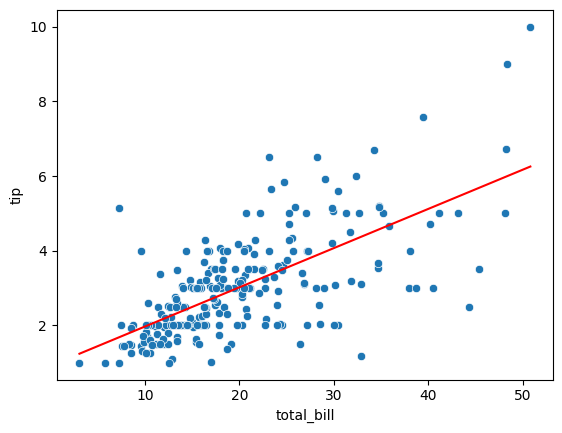

In [39]:
sns.scatterplot(data = tips_df, x = 'total_bill', y=  'tip')
sns.lineplot(data = tips_df, x = 'total_bill', y = 'pred', color = 'red')

- 선형회귀
    - 단순선형회귀: X변수가 1개
    - 다중선형회귀: X변수가 2개 이상

# 범주형 데이터 사용하기 
- 함수를 쓸수도, sklearn에서 제공하는 함수를 쓸수도있음(4단원)

In [40]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


In [41]:
# Female 0, Male 1 
def get_sex(x):
    if x == 'Female':
        return 0
    else:
        return 1

In [43]:
#apply method는 매 행을 특정한 함수를 적용한다.
tips_df['sex_en'] = tips_df['sex'].apply(get_sex)
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred,sex_en
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,0
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1


In [44]:
# 모델설계도 가져오기
# 학습
# 평가
model_lr3 = LinearRegression()
X = tips_df[['total_bill','sex_en']]
y = tips_df[['tip']]

In [45]:
X.head(3)

,total_bill,sex_en
0,16.99,0
1,10.34,1
2,21.01,1


In [46]:
y.head(3)

,tip
0,1.01
1,1.66
2,3.50


In [47]:
#학습
model_lr3.fit(X,y)

LinearRegression()

In [50]:
#예측
y_pred_tip2 = model_lr3.predict(X)
y_pred_tip2[:5]

array([[2.72117624],
       [1.99477235],
       [3.1176016 ],
       [3.39857199],
       [3.52094215]])

In [51]:
# 단순선형회귀 mse: X변수가 전체 금액
# 다중선형회귀 mse: X변수가 전체 금액, 성별
print('단순선형회귀', mean_squared_error(y_true_tip, y_pred_tip))
print('다중선형회귀', mean_squared_error(y_true_tip, y_pred_tip2))

단순선형회귀 1.036019442011377
다중선형회귀 1.0358604137213614


In [52]:
print('단순선형회귀', r2_score(y_true_tip, y_pred_tip))
print('다중선형회귀', r2_score(y_true_tip, y_pred_tip2))

단순선형회귀 0.45661658635167657
다중선형회귀 0.45669999534149974


<Axes: xlabel='sex', ylabel='tip'>

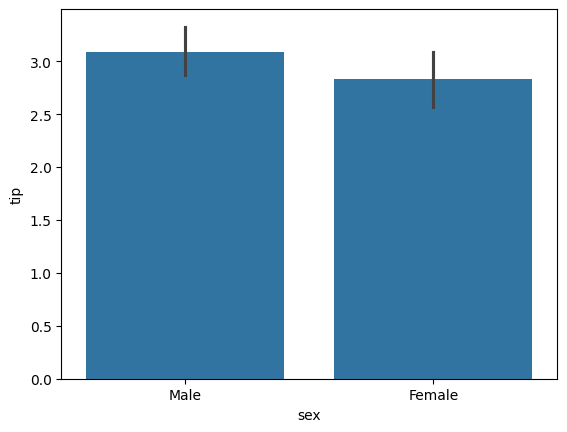

In [53]:
sns.barplot(data = tips_df, x = 'sex', y = 'tip')